In [2]:
import pandas as pd
import numpy as np
import scipy
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Extract for T-test

Objective: create a table displaying the mean/median gini coefficients for all simulation scenarios

Get gini coef stats: mead / median / std.dev / distribution

But first! Create a big df with all simulation outputs:
a) total views, average views, median views, stdev views, Q1, Q3, total ratings, avg

In [3]:
def load_basic(s,path,file_name,consumer,ifilter,simulations,steps,percentage):
    df00 = pd.read_pickle(path+file_name+'/'+consumer+str(percentage)+'/'+str([s[0],s[1],ifilter,simulations]))
    df0 = get_basics(df00)
    df0['u_size'] = [s[0]]*len(df0)
    df0['p_size'] = [s[1]]*len(df0)
    df0['filter'] = [ifilter]*len(df0)
    df0['u_cogni'] = [consumer]*len(df0)
    df0['steps'] = [steps]*len(df0)
    return df0
    
def get_basics(df):
    df2 = df#[M.columns[:-2]]\n"
    viewstats = {'mean':[],'median':[],'std':[],'total':[],'minmax':[]}
    ratingstats = {'mean':[],'median':[],'std':[],'total':[],'minmax':[]}
    
    for i in df2.values:
            raw_views = []
            raw_rating_mean = []
            for j in i:
                raw_views.append(float(len(j)))
                raw_rating_mean.append(np.mean(j))       #Mind we take totals for views and mean for ratings\n",
            #Get mean, median, stdev, q1, q3, \n",
            viewstats = update_stats(viewstats,raw_views)
            ratingstats = update_stats(ratingstats,raw_rating_mean)
            c,bins,gini = G(np.array(raw_views))
            viewstats['gini'] = gini
            c,bins,gini = G(np.array(raw_rating_mean))
            ratingstats['gini'] = gini
        
            dfv = pd.DataFrame()
            for k in ['mean','median','std','total','minmax','gini']:
                dfv['v_'+str(k)] = viewstats[str(k)]
            for k in ['mean','median','std','total','minmax','gini']:
                dfv['r_'+str(k)] = ratingstats[str(k)]
            
            return dfv
        
        
def plot_basic(dfv):
    gg = sns.jointplot(x='views',y='rating',data=dfv)
    plt.show()

    dfv = dfv.sort_values(by='rating',ascending=False)
    plt.plot(list(dfv.rating),linewidth=2,alpha=0.5,c='r',label='Rating')
    plt.legend()
    plt.show() 
    dfv = dfv.sort_values(by='views',ascending=False)
    plt.plot(list(dfv.views),linewidth=2,alpha=0.5,c='b',label='Views')
    plt.legend()
    plt.show()

    return dfv

def update_stats(dct,raw_list):
    dct['mean'].append(np.mean(raw_list))
    dct['median'].append(np.median(raw_list))
    dct['std'].append(np.std(raw_list))
    dct['total'].append(len(raw_list))
    dct['minmax'].append([min(raw_list),max(raw_list)])
    return dct

def get_gini(df2):
    views_sim = {}
    id_ = 0
    for vals in df2.values:
        t_views = []
        for i in vals:
            t_views.append(len(i))
        views_sim[id_] = t_views
        id_ += 1
    gini = [G(np.array(views_sim[k]))[-1] for k in range(0,len(df2))]
    return gini

def get_parameter_filter(ifilter,parameter,df):
    values = df[parameter]
    v_all = []

    dropped += 1
    print(dropped)
    return cleaned

def G(v):
    bins = np.linspace(0., 100., 11)
    total = float(np.sum(v))
    yvals = []
    for b in bins:
        bin_vals = v[v <= np.percentile(v, b)]
        bin_fraction = (np.sum(bin_vals) / total) * 100.0
        yvals.append(bin_fraction)
    # perfect equality area\n",
    pe_area = np.trapz(bins, x=bins)
    # lorenz area\n",
    lorenz_area = np.trapz(yvals, x=bins)
    gini_val = (pe_area - lorenz_area) / float(pe_area)
    return bins, yvals, gini_val

def plot_gini(v):
    bins, result, gini_val = G(v)
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(bins, result, label="observed")
    plt.plot(bins, bins, '--', label="perfect eq.")
    plt.xlabel("fraction of population")
    plt.ylabel("fraction of wealth")
    plt.title("GINI: %.4f" %(gini_val))
    plt.legend()
    plt.subplot(2, 1, 2)
    plt.hist(v, bins=20)

In [5]:
### Path parameters , select simulation
steps = 100
consumer = 'C3'
prcnt = 100
ifilter = 'Sociological'
simulations = 100
#path = 'C:/Users/andre/OneDrive - Harrisburg University/Data/Simulations/'
path = 'C:/Simulations/'
file_name = ifilter+str(steps)
sim_path = path+file_name+'/'+consumer+'/100'        #COGNITIVE EXTENSION    50 percent
percentage = '/100'

size = [[2000,400],[5000,1000],[10000,2000]]#,[20000,4000]]#,[40000,8000]]

#Create dataframes from files
for consumer in ['C3']:#,'C30','C60']:
    df = load_basic(size[0],path,file_name,consumer,ifilter,simulations,steps,percentage)
    for s in size[1:]:
        dftemp = load_basic(s,path,file_name,consumer,ifilter,simulations,steps,percentage)
        df = df.append(dftemp,ignore_index=True)
    df.to_pickle('Results_F'+str(ifilter)+'_S'+str(steps)+'_C'+str(consumer)+'_P'+str(prcnt))


    

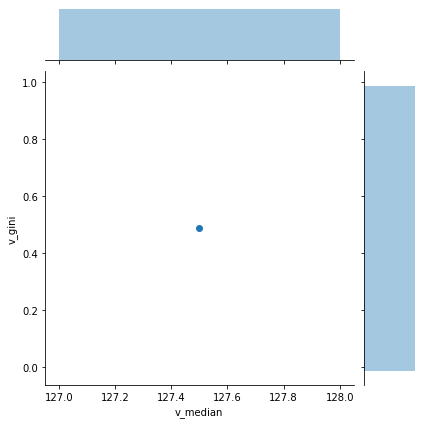

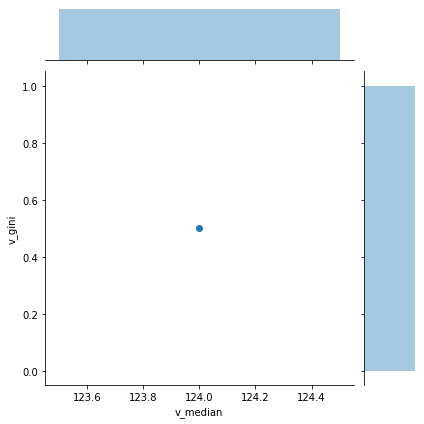

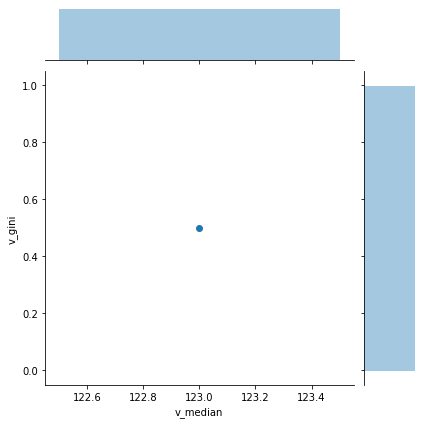

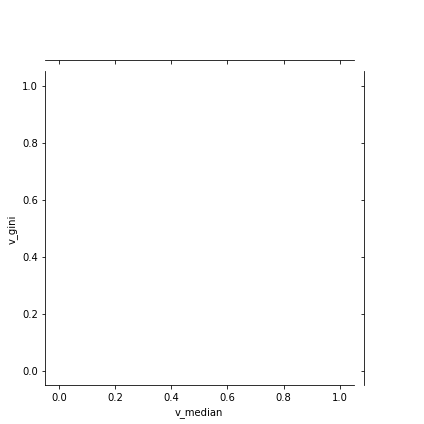

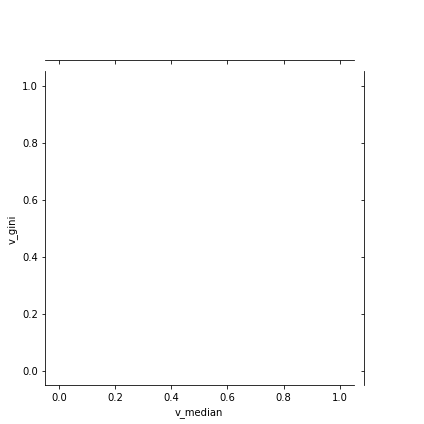

In [6]:
sns.jointplot(x='v_median',y='v_gini',data=df[df['u_size']==2000])
plt.show()
sns.jointplot(x='v_median',y='v_gini',data=df[df['u_size']==5000])
plt.show()
sns.jointplot(x='v_median',y='v_gini',data=df[df['u_size']==10000])
plt.show()
sns.jointplot(x='v_median',y='v_gini',data=df[df['u_size']==20000])
plt.show()
sns.jointplot(x='v_median',y='v_gini',data=df[df['u_size']==40000])
plt.show()

## Part 2 - Analysis

After extracting all statistics from all the simulations, proceed here. 
You should have a dataframe like this:


In [3]:
import pandas as pd
import numpy as np
import scipy
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [67]:
df = pd.read_pickle('Results_FNone_S100_CC30')
df.head()

,v_mean,v_median,v_std,v_total,v_minmax,v_gini,r_mean,r_median,r_std,r_total,r_minmax,r_gini,u_size,p_size,filter,u_cogni,steps
0,249.1700,230.0,88.400911,400,"[108.0, 724.0]",0.173055,0.614203,0.615249,0.021704,400,"[0.5466326749436872, 0.6699810848911134]",0.019365,2000,400,None,C30,100
1,250.0225,222.0,92.487091,400,"[111.0, 618.0]",0.191591,0.612969,0.614174,0.021964,400,"[0.554688597901843, 0.6574470620387944]",0.019814,2000,400,None,C30,100
2,249.9500,229.0,82.957715,400,"[118.0, 653.0]",0.171266,0.614046,0.613540,0.023420,400,"[0.5328313872124253, 0.6822422508038966]",0.020687,2000,400,None,C30,100
3,250.2950,229.5,91.367297,400,"[119.0, 714.0]",0.185720,0.612573,0.614710,0.022962,400,"[0.5349495016697796, 0.6820610212300767]",0.020353,2000,400,None,C30,100
4,249.9075,229.0,83.931484,400,"[115.0, 591.0]",0.178154,0.614759,0.613999,0.021924,400,"[0.5431652339489057, 0.6813525687742572]",0.019626,2000,400,None,C30,100


In [68]:
len(df)

510


Now I will provide the basic functions / steps to create a table showing a comparisson between simulation parameter and response variable (i.e. gini coef).

## Relevance of Size

In [69]:
#How many sizes?
print(set(df.u_size))

{20000, 40000, 5000, 2000, 10000}


In [70]:
#Fix sizes we have:
sizes = [2000,5000,10000,20000,40000][:3] 

In [71]:
print([np.mean(df[df['u_size']==i].v_gini) for i in sizes])

[0.18012774233813564, 0.2595102313414077, 0.30248506821752635]


In [72]:
print([np.std(df[df['u_size']==i].v_gini) for i in sizes])

[0.0070410343661706, 0.005237717764678862, 0.00430174665506414]


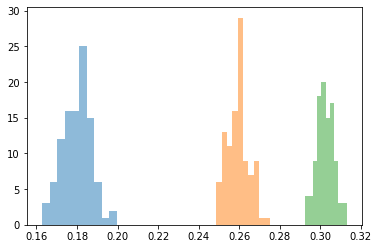

In [73]:
for i in sizes:
    plt.hist(df[df['u_size']==i].v_gini,alpha=0.5,bins=10)
plt.show()

In [74]:
for k in sizes:
    print(len(df[df['u_size']==k].v_gini))

102
102
102


In [75]:
test_d = {str(k):list(df[df['u_size']==k].v_gini)[:100] for k in sizes}
test_df = pd.DataFrame.from_dict(test_d)
test_df.head()

,2000,5000,10000
0,0.173055,0.256605,0.306562
1,0.191591,0.255731,0.299956
2,0.171266,0.261471,0.304617
3,0.185720,0.258762,0.301425
4,0.178154,0.258990,0.299257


In [76]:
none_c30 = df[df['u_size']==10000].v_gini

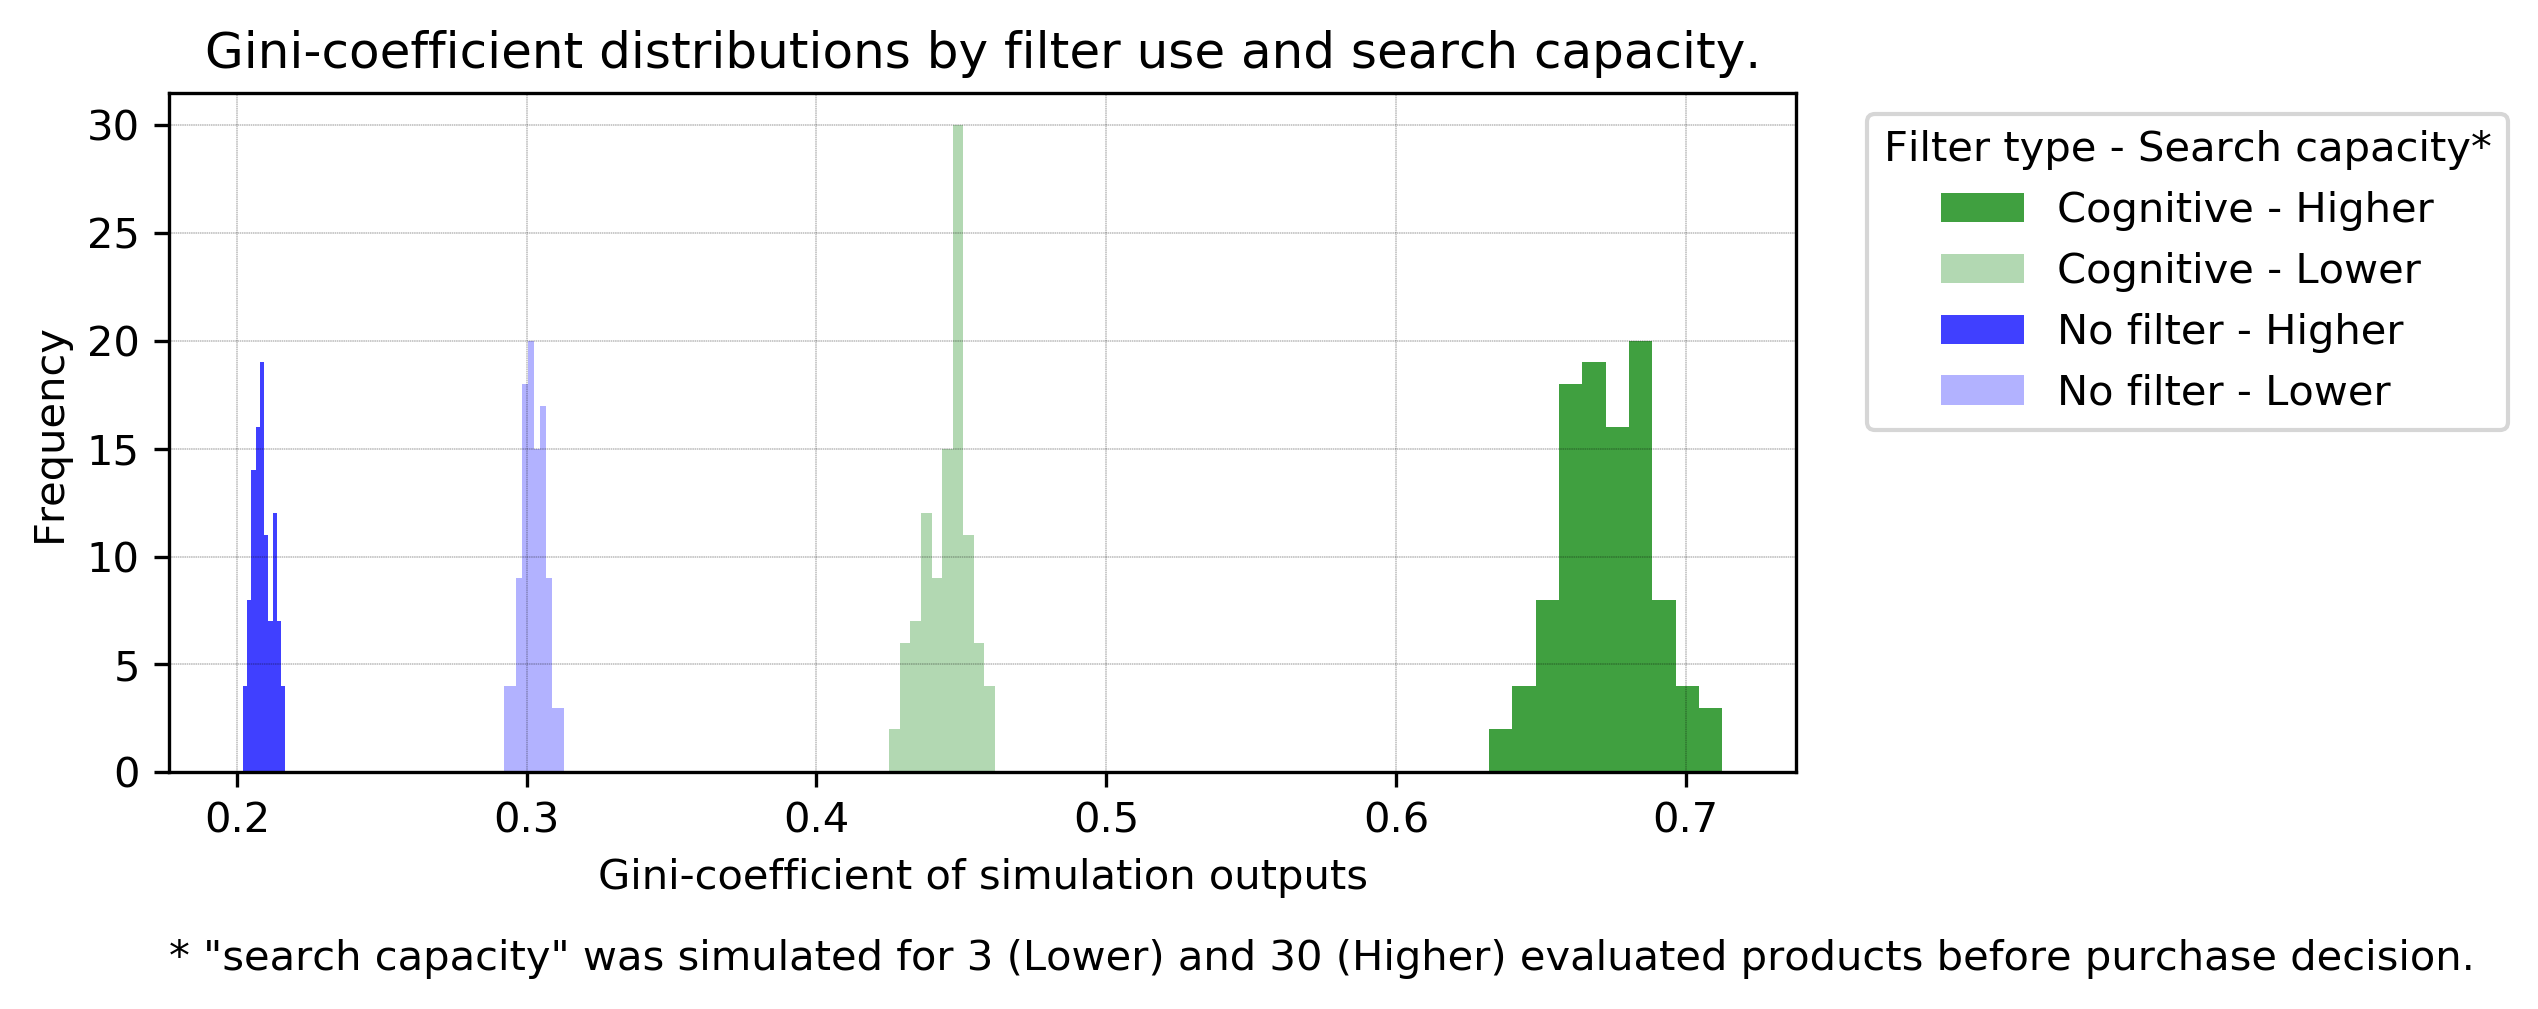

In [139]:
bb = 10
plt.figure(num=None, figsize=(7, 3), dpi=300, facecolor='w', edgecolor='k')
plt.grid(color='black', linestyle='--', linewidth=0.1)
plt.hist(cognitive_c3,label='Cognitive - Higher',alpha=0.75,color='g',bins=bb)
plt.hist(cognitive_c30,label='Cognitive - Lower',alpha=0.3,color='g',bins=bb)
plt.hist(none_c3,label='No filter - Higher',alpha=0.75,color='b',bins=bb)
plt.hist(none_c30,label='No filter - Lower',alpha=0.3,color='b',bins=bb)
plt.title('Gini-coefficient distributions by filter use and search capacity.')
plt.legend(loc=1,bbox_to_anchor=(1.45, 1),title='Filter type - Search capacity*')
plt.ylabel('Frequency')
plt.xlabel('Gini-coefficient of simulation outputs')
plt.annotate('* "search capacity" was simulated for 3 (Lower) and 30 (Higher) evaluated products before purchase decision.', (0,0), (0, -40), xycoords='axes fraction', textcoords='offset points', va='top')
plt.savefig('Effects on Gini (Early results)', dpi=300, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format=None,
        transparent=False, bbox_inches='tight')
plt.show()

In [49]:
save_list = []
for s in sizes:
    save_list.append(np.mean(test_df[str(s)]))
    print(str(s)+' '+str(np.mean(test_df[str(s)])))


2000 0.5263376469808423
5000 0.5701250758353413
10000 0.5876885476838961


In [50]:
socio_c30_p50 = save_list+[0,0]

In [51]:
socio_df = {str('c3_p50'):socio_c3_p50,str('c3_p100'):socio_c3_p100,str('c30_p50'):socio_c30_p50,str('c30_p100'):socio_c30_p100}

In [52]:
sociodf = pd.DataFrame(socio_df)
sociodf.index = sizes+[20000,40000]
sociodf

,c3_p50,c3_p100,c30_p50,c30_p100
2000,0.480429,0.480983,0.526338,0.482366
5000,0.496831,0.497128,0.570125,0.496711
10000,0.502643,0.502359,0.587689,0.502262
20000,0.000000,0.000000,0.000000,0.000000
40000,0.000000,0.000000,0.000000,0.000000


In [78]:
sociodf.to_pickle('Sociological_Size_vs_UserSearch_over_Gini')

In [310]:
cogni_df = {str('c3_p50'):cogni_c3_p50[:5],str('c3_p100'):cogni_c3_p100[:5],str('c30_p50'):cogni_c30_p50[:5],str('c30_p100'):cogni_c30_p100[:5]}

In [311]:
cognidf = pd.DataFrame(cogni_df)
cognidf.index = sizes+[20000,40000]
cognidf

,c3_p50,c3_p100,c30_p50,c30_p100
2000,0.591013,0.610034,0.355600,0.355600
5000,0.645436,0.669819,0.414473,0.414473
10000,0.672581,0.701285,0.445574,0.445574
20000,0.696779,0.727187,0.000000,0.000000
40000,0.714373,0.745863,0.000000,0.000000


In [208]:
cognidf.to_pickle('Cognitive_Size_vs_UserSearch_over_Gini')

In [115]:
nonedf = pd.DataFrame(none_df)

In [132]:
nonedf.index = sizes

In [133]:
nonedf

,c3,c30,c60
2000,0.199453,0.180128,0.126872
5000,0.206785,0.259510,0.208289
10000,0.209065,0.302485,0.267830
20000,0.210219,0.328759,0.311435
40000,0.211397,0.344546,0.338169


In [134]:
nonedf.to_pickle('None_Size_vs_UserSearch_over_Gini')

## Tests for the data (using previously specified test_df[] datraframe )

Ok. Lets compare these simulation outputs with an Independent Sample T-Test.

Let's check for assumptions:

In [95]:
#Testing for Normality:
for s in sizes:             # DEPENDS ON TH SOCIOLOGICAL< COGNITIVE , OR NONES
    w,p = scipy.stats.shapiro(list(test_df[str(s)]))
    print('Size: '+str(s)+' . SWstat: '+str(w)+' . p-value: '+str(p))
    if p > 0.05:
        print('Can not reject H0 of normal distribution')
    else:
        print('Reject H0. NOT NORMAL DISTRIBUTION')
    print()

Size: 2000 . SWstat: 0.9886351823806763 . p-value: 0.5561535358428955
Can not reject H0 of normal distribution

Size: 5000 . SWstat: 0.9802969694137573 . p-value: 0.14019621908664703
Can not reject H0 of normal distribution

Size: 10000 . SWstat: 0.9820107817649841 . p-value: 0.1900891810655594
Can not reject H0 of normal distribution

Size: 20000 . SWstat: 0.9901050329208374 . p-value: 0.673086941242218
Can not reject H0 of normal distribution

Size: 40000 . SWstat: 0.9776828289031982 . p-value: 0.08757885545492172
Can not reject H0 of normal distribution



Ok. They appear to not follow something else. We assume then that the distribution is normal.
Thus, as normal and independent samples, we proceed with the two sample t-test between all sizes.

In [96]:
#Get two-sample t-test related
for s in range(len(sizes)-1):
    t,p = scipy.stats.ttest_rel(test_df[str(sizes[s])],test_df[str(sizes[s+1])])
    print('Sizes: '+str(sizes[s])+' vs '+str(sizes[s+1])+' - T-test: '+str(t)+', p-value: '+str(p))

Sizes: 2000 vs 5000 - T-test: -9.156829628249225, p-value: 7.549489573055874e-15
Sizes: 5000 vs 10000 - T-test: -4.039719935248117, p-value: 0.00010577006834149991
Sizes: 10000 vs 20000 - T-test: -2.785494453907122, p-value: 0.006405474211912315
Sizes: 20000 vs 40000 - T-test: -3.6043418328113668, p-value: 0.0004919446655138345


In [97]:
#Get two-sample t-test independent
for s in range(len(sizes)-1):
    t,p = scipy.stats.ttest_ind(test_df[str(sizes[s])],test_df[str(sizes[s+1])])
    print('Sizes: '+str(sizes[s])+' vs '+str(sizes[s+1])+' - T-test: '+str(t)+', p-value: '+str(p))

Sizes: 2000 vs 5000 - T-test: -9.806389730882284, p-value: 9.349475164122184e-19
Sizes: 5000 vs 10000 - T-test: -4.2280584059323925, p-value: 3.5986403394746315e-05
Sizes: 10000 vs 20000 - T-test: -2.8412283507543923, p-value: 0.004964107735377952
Sizes: 20000 vs 40000 - T-test: -3.8673487831593576, p-value: 0.00014919915846441138


## Results

It appears that size does affect the gini coefficient. The mean differences are significant and it stronger for the lower ranges.


## Explore Default simulation 

How does views? and Ratings behave?

In [63]:
set(df['filter'])

{'Sociological'}

Mean


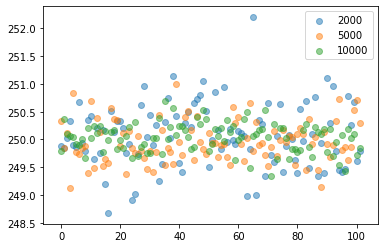

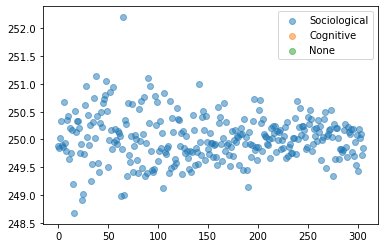

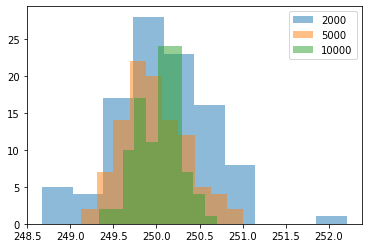

Median


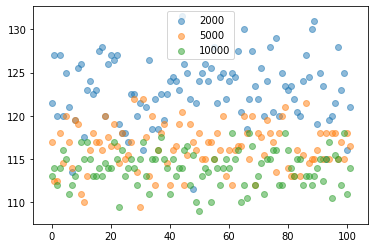

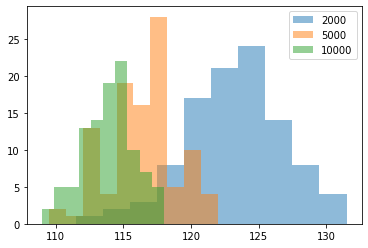

In [58]:
#MEAN
print('Mean')
for s in sizes:
    plt.scatter(range(len(list(df[df['u_size']==s].v_mean))),list(df[df['u_size']==s].v_mean),alpha=0.5,label=str(s))
plt.legend()
plt.show()

for s in ['Sociological','Cognitive','None']:
    plt.scatter(range(len(list(df[df['filter']==s].v_mean))),list(df[df['filter']==s].v_mean),alpha=0.5,label=str(s))
plt.legend()
plt.show()


for s in sizes:
    plt.hist(list(df[df['u_size']==s].v_mean),alpha=0.5,label=str(s))
plt.legend()
plt.show()
    
#MEDIAN
print('Median')
for s in sizes:
    plt.scatter(range(len(list(df[df['u_size']==s].v_median))),list(df[df['u_size']==s].v_median),alpha=0.5,label=str(s))
plt.legend()
plt.show()

for s in sizes:
    plt.hist(list(df[df['u_size']==s].v_median),alpha=0.5,label=str(s))
plt.legend()
plt.show()

We see that the mean does change, significatively increasing as we move between simulation sizes.
But, it is also possible to see that this increased average is moving within the range of smaller simulation sizes. Meaning, that the average appers to be stabilizing below 0.22, regardless of size. So, we should expect an "all else equal" default situation with an expected gini of 0.21 and 0.22. Particularly if we use simulation size: 10000, 20000, and 40000 users per simulation. 

In [99]:
scipy.stats.ttest_rel(g4,g5)

NameError: name 'g4' is not defined

In [100]:
ifilter = 'Cognitive'
cdf00 = pd.read_pickle('C:/Simulations/'+str([2000,400,ifilter,simulations]))
cdf11 = pd.read_pickle('C:/Simulations/'+str([5000,1000,ifilter,simulations]))
cdf22 = pd.read_pickle('C:/Simulations/'+str([10000,2000,ifilter,simulations]))
cdf33 = pd.read_pickle('C:/Simulations/'+str([20000,4000,ifilter,simulations]))
cdf44 = pd.read_pickle('C:/Simulations/'+str([40000,8000,ifilter,simulations]))


NameError: name 'simulations' is not defined

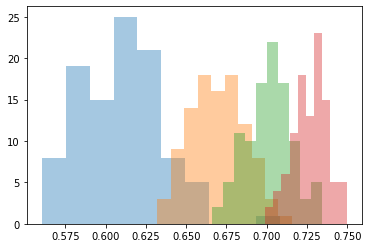

In [70]:
for i in [cdf00,cdf11,cdf22,cdf33]:
    plt.hist(get_gini(i),alpha=0.4,bins=10)

## OLS Results

In [4]:
## Regression

#get all dfs.
df = pd.read_pickle('Results_FNone_S100_CC3')
df['C3'] = 1
df['C30'] = 0
df['C60'] = 0
df1 = pd.read_pickle('Results_FNone_S100_CC30')
df1['C3'] = 0
df1['C30'] = 1
df1['C60'] = 0
df2 = pd.read_pickle('Results_FNone_S100_CC60')
df2['C3'] = 0
df2['C30'] = 0
df2['C60'] = 1

df = df.append(df1)
df = df.append(df2)
df['None'] = 1
df['Cogni'] = 0
df['Socio'] = 0
df['P50'] = 0
df['P100'] = 0
df['S100'] = 1
df['S200'] = 0

none_df = df

df = pd.read_pickle('Results_FCognitive_S100_CC3_P50')
df['C3'] = 1
df['C30'] = 0
df['p50'] = 1
df['p100'] = 0
df1 = pd.read_pickle('Results_FCognitive_S100_CC3_P100')
df1['C3'] = 1
df1['C30'] = 0
df1['P50'] = 0
df1['P100'] = 1
df2 = pd.read_pickle('Results_FCognitive_S100_CC30_P50')
df2['C3'] = 0
df2['C30'] = 1
df2['P50'] = 1
df2['P100'] = 0
df3 = pd.read_pickle('Results_FCognitive_S100_CC30_P100')
df3['C3'] = 0
df3['C30'] = 1
df3['P50'] = 0
df3['P100'] = 1

df = df.append(df1)
df = df.append(df2)
df = df.append(df3)
df['None'] = 0
df['Cogni'] = 1
df['Socio'] = 0
df['S100'] = 1
df['S200'] = 0

df['C60'] = 0
cogni_df = df

df = pd.read_pickle('Results_FSociological_S100_CC3_P50')
df['C3'] = 1
df['C30'] = 0
df['P50'] = 1
df['P100'] = 0
#df1 = pd.read_pickle('Results_FSociological_S100_CC3_P100')
#df1['C3'] = 1
#df1['C30'] = 0
#df1['p50'] = 0
#df1['p100'] = 1
df2 = pd.read_pickle('Results_FSociological_S100_CC30_P50')
df2['C3'] = 0
df2['C30'] = 1
df2['P50'] = 1
df2['P100'] = 0
df3 = pd.read_pickle('Results_FSociological_S100_CC30_P100')
df3['C3'] = 0
df3['C30'] = 1
df3['P50'] = 0
df3['P100'] = 1

#df = df.append(df1)
df = df.append(df2)
df = df.append(df3)
df['None'] = 0
df['Cogni'] = 0
df['Socio'] = 1
df['S100'] = 1
df['S200'] = 0

df['C60'] = 0
socio_df = df

In [5]:
df = none_df.append(cogni_df)
df = df.append(socio_df)

In [6]:
from sklearn import linear_model
from statsmodels.api import OLS
import scipy.stats as stats


In [7]:
print(df.columns)
dft = df[['C3','C30','C60','Cogni','Socio','None','v_median','v_mean','v_total','p_size','v_gini']]

Index(['v_mean', 'v_median', 'v_std', 'v_total', 'v_minmax', 'v_gini',
       'r_mean', 'r_median', 'r_std', 'r_total', 'r_minmax', 'r_gini',
       'u_size', 'p_size', 'filter', 'u_cogni', 'steps', 'C3', 'C30', 'C60',
       'None', 'Cogni', 'Socio', 'P50', 'P100', 'S100', 'S200', 'p50', 'p100'],
      dtype='object')


In [68]:
dft = dft.dropna()

In [69]:
#dft = dft.drop('Socio',1)

In [8]:
dft

,C3,C30,C60,Cogni,Socio,None,v_median,v_mean,v_total,p_size,v_gini
0,1,0,0,0,0,1,121.0,125.5375,400,400,0.191716
1,1,0,0,0,0,1,120.0,124.9750,400,400,0.192733
2,1,0,0,0,0,1,119.0,125.4125,400,400,0.199169
3,1,0,0,0,0,1,123.0,125.2075,400,400,0.204435
4,1,0,0,0,0,1,122.0,124.6175,400,400,0.201723
...,...,...,...,...,...,...,...,...,...,...,...
0,0,1,0,0,1,0,124.0,220.9765,2000,2000,0.504087
0,0,1,0,0,1,0,125.0,220.7185,2000,2000,0.497866
0,0,1,0,0,1,0,124.0,221.1590,2000,2000,0.499818
0,0,1,0,0,1,0,123.0,220.8960,2000,2000,0.499647


In [9]:
df_Y = dft['v_gini']
df_X = dft[['C3','C30','C60','Cogni','None','v_median','v_mean','v_total','p_size']]

[[1.         0.23138553]
 [0.23138553 1.        ]]
(0.2313855292195628, 1.008551348415986e-50)


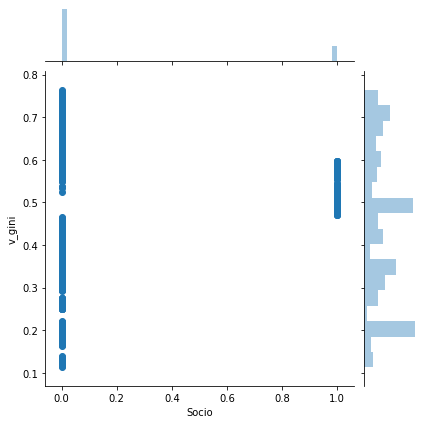

In [10]:
#Some exploration
temp_ = 'Socio'
sns.jointplot(x=temp_,y='v_gini',data=dft)

print(np.corrcoef(dft[temp_],dft['v_gini']))

print(stats.pearsonr(dft[temp_],dft['v_gini']))

In [11]:
OLS(df_Y,df_X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 v_gini   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 1.648e+04
Date:                Thu, 09 Apr 2020   Prob (F-statistic):               0.00
Time:                        12:18:33   Log-Likelihood:                 8111.7
No. Observations:                4080   AIC:                        -1.621e+04
Df Residuals:                    4072   BIC:                        -1.616e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
C3             0.2442      0.006     43.368      0.000       0.233       0.255
C30            0.2227      0.008     29.426      0.000       0.208       0.238
C60            0.2414      0.008     29.428      0.000       0.225       0.257
Cogni          0.1306      0.002     66.157      0.000       0.127       0.134
None           0.0960      0.004     24.037      0.000       0.088       0.104
v_median      -0.0048   3.89e-05   -122.532      0.000      -0.005      -0.005
v_mean         0.0038   4.58e-05     82.403      0.000       0.004       0.004
v_total     1.527e-06   1.34e-07     11.401      0.000    1.26e-06    1.79e-06
p_size      1.527e-06   1.34e-07     11.401      0.000    1.26e-06    1.79e-06
==============================================================================
Omnibus:                      726.681   Durbin-Watson:                   0.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.884
Skew:                          -0.069   Prob(JB):                     5.20e-35
Kurtosis:                       2.046   Cond. No.                     5.54e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  3e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [53]:
df_X

,C3,C30,C60,Cogni,Socio,None,v_median,v_mean,v_total,p_size
0,1,0,0,0,0,1,121.0,125.5375,400,400
1,1,0,0,0,0,1,120.0,124.9750,400,400
2,1,0,0,0,0,1,119.0,125.4125,400,400
3,1,0,0,0,0,1,123.0,125.2075,400,400
4,1,0,0,0,0,1,122.0,124.6175,400,400
...,...,...,...,...,...,...,...,...,...,...
301,0,1,0,0,1,0,124.0,220.9765,2000,2000
302,0,1,0,0,1,0,125.0,220.7185,2000,2000
303,0,1,0,0,1,0,124.0,221.1590,2000,2000
304,0,1,0,0,1,0,123.0,220.8960,2000,2000


In [54]:
regr = linear_model.LinearRegression()
regr.fit(df_X, df_Y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


Intercept: 
 0.3116423186034617
Coefficients: 
 [ 8.12540694e-03 -1.33715883e-02  5.24618134e-03  5.50962320e-02
 -7.55315344e-02  2.04353023e-02 -4.76181699e-03  3.77022388e-03
  1.52660318e-06  1.52660318e-06]


In [67]:
OLS(df_Y,df_X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 v_gini   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                 1.648e+04
Date:                Fri, 03 Apr 2020   Prob (F-statistic):               0.00
Time:                        10:27:40   Log-Likelihood:                 8111.7
No. Observations:                4080   AIC:                        -1.621e+04
Df Residuals:                    4072   BIC:                        -1.616e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
C3             0.2442      0.006     43.368      0.000       0.233       0.255
C30            0.2227      0.008     29.426      0.000       0.208       0.238
C60            0.2414      0.008     29.428      0.000       0.225       0.257
Cogni          0.1306      0.002     66.157      0.000       0.127       0.134
None           0.0960      0.004     24.037      0.000       0.088       0.104
v_median      -0.0048   3.89e-05   -122.532      0.000      -0.005      -0.005
v_mean         0.0038   4.58e-05     82.403      0.000       0.004       0.004
v_total     1.527e-06   1.34e-07     11.401      0.000    1.26e-06    1.79e-06
p_size      1.527e-06   1.34e-07     11.401      0.000    1.26e-06    1.79e-06
==============================================================================
Omnibus:                      726.681   Durbin-Watson:                   0.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              157.884
Skew:                          -0.069   Prob(JB):                     5.20e-35
Kurtosis:                       2.046   Cond. No.                     5.46e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.09e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [62]:
#Lets try without the inclusion of the Sociological filter

df_X = df_X.drop('Socio',1)

In [63]:
df_X

,C3,C30,C60,Cogni,None,v_median,v_mean,v_total,p_size
0,1,0,0,0,1,121.0,125.5375,400,400
1,1,0,0,0,1,120.0,124.9750,400,400
2,1,0,0,0,1,119.0,125.4125,400,400
3,1,0,0,0,1,123.0,125.2075,400,400
4,1,0,0,0,1,122.0,124.6175,400,400
...,...,...,...,...,...,...,...,...,...
301,0,1,0,0,0,124.0,220.9765,2000,2000
302,0,1,0,0,0,125.0,220.7185,2000,2000
303,0,1,0,0,0,124.0,221.1590,2000,2000
304,0,1,0,0,0,123.0,220.8960,2000,2000


In [59]:
cg1 = get_gini(cdf11)
cg2 = get_gini(cdf22)
cg3 = get_gini(cdf33)

C:\Users\ELHuillier\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\ELHuillier\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


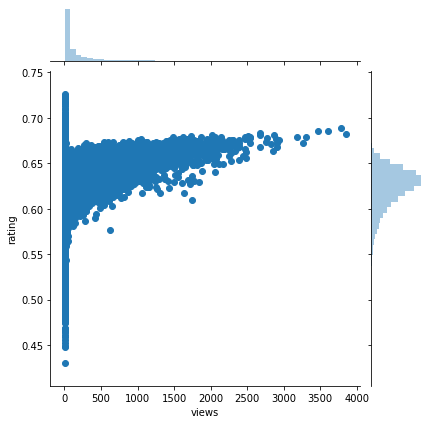

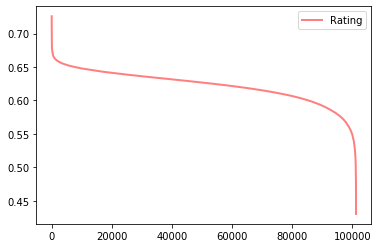

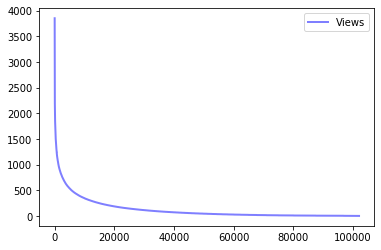

In [60]:
cdf1 = get_basics(cdf11)

In [ ]:
df1

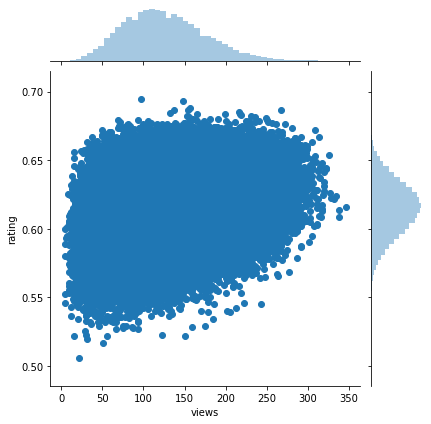

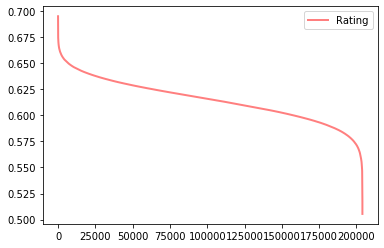

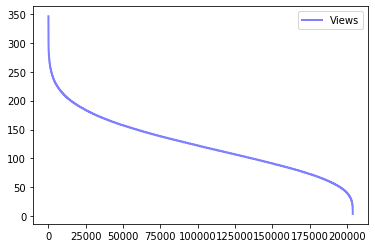

In [27]:
df2 = get_basics(df22)

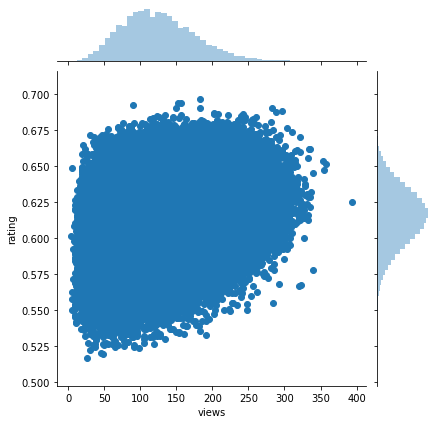

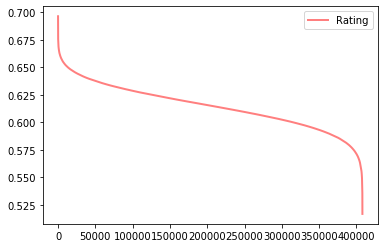

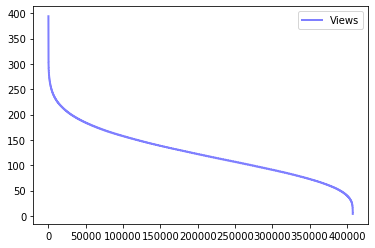

In [28]:
df3 = get_basics(df33)

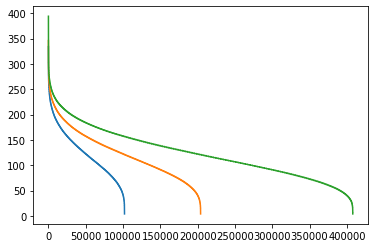

In [33]:
plt.plot(list(df.views))
plt.plot(list(df2.views))
plt.plot(list(df3.views))


In [6]:
def G(v):
    bins = np.linspace(0., 100., 11)
    total = float(np.sum(v))
    yvals = []
    for b in bins:
        bin_vals = v[v <= np.percentile(v, b)]
        bin_fraction = (np.sum(bin_vals) / total) * 100.0
        yvals.append(bin_fraction)
    # perfect equality area
    pe_area = np.trapz(bins, x=bins)
    # lorenz area
    lorenz_area = np.trapz(yvals, x=bins)
    gini_val = (pe_area - lorenz_area) / float(pe_area)
    return bins, yvals, gini_val

def plot_gini(v):
    bins, result, gini_val = G(v)
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(bins, result, label="observed")
    plt.plot(bins, bins, '--', label="perfect eq.")
    plt.xlabel("fraction of population")
    plt.ylabel("fraction of wealth")
    plt.title("GINI: %.4f" %(gini_val))
    plt.legend()
    plt.subplot(2, 1, 2)
    plt.hist(v, bins=20)

In [13]:
G(df1.views)[-1]

0.20554719387365095

In [31]:
views_sim = {}
id_ = 0
for vals in df11.values:
        t_views = []
        for i in vals:
            t_views.append(len(i))
        views_sim[id_] = t_views
        id_ += 1
            

In [32]:
gini = [G(np.array(views_sim[k]))[-1] for k in range(0,len(df11))]

In [33]:
gini

[0.2077968790053832,
 0.20532536329300302,
 0.20623247341551687,
 0.2061027093890907,
 0.20692321237053984,
 0.20588122360168953,
 0.2025967694238192,
 0.1999543400942036,
 0.2082715495844609,
 0.2057965906177903,
 0.21142166598865714,
 0.19532872939204027,
 0.20922331651853637,
 0.2039480111793582,
 0.21055226667092183,
 0.20977845500889533,
 0.20677327562021564,
 0.19481176969280115,
 0.202342772842436,
 0.20168859281269724,
 0.2083650917672572,
 0.21060547997700704,
 0.20713898758783325,
 0.20678279377170375,
 0.2056677080829929,
 0.20789941254622,
 0.21099448311255092,
 0.20372154604476073,
 0.20691051068314645,
 0.1953661752367254,
 0.2078450955169741,
 0.20326193028203943,
 0.20949884336153554,
 0.205343657852468,
 0.20594923046172298,
 0.20932089905299536,
 0.20549420673442137,
 0.2118934797573118,
 0.20201114727355599,
 0.20807160904467964,
 0.2077933702010677,
 0.21106978080748412,
 0.20492710106297563,
 0.20758378128339683,
 0.2067459019662585,
 0.20935750061909383,
 0.207768

0
0


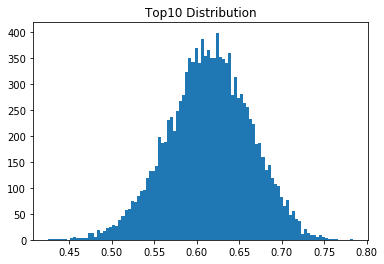

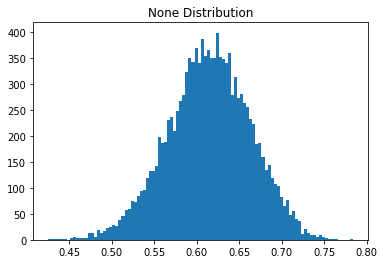

In [10]:
top10_r = get_parameter_filter(ifilter,0,df)
top10_r = clean_values(top10_r)
top10_r.sort(reverse=True)

none_r = get_parameter_filter(ifilter,0,df)
none_r = clean_values(none_r)
none_r.sort(reverse=True)

top10_r = [i for i in top10_r if i < 400]
plt.title('Top10 Distribution')
plt.hist(top10_r,bins=100)
plt.show()

plt.title('None Distribution')
plt.hist(none_r,bins=100)
plt.show()

# Views

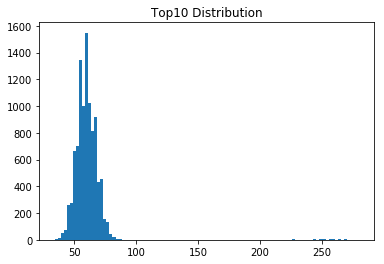

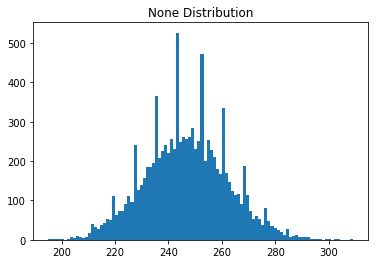

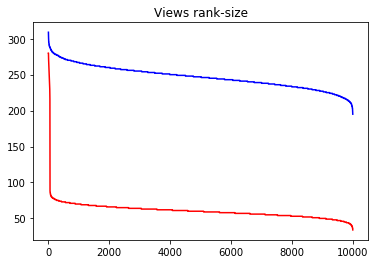

In [75]:
top10_v = get_parameter_filter(ifilter,1,df_top10)
top10_v.sort(reverse=True)

none_v = get_parameter_filter(ifilter,1,df_none)
none_v.sort(reverse=True)

plt.title('Top10 Distribution')
plt.hist(top10_v,bins=100)
plt.show()

plt.title('None Distribution')
plt.hist(none_v,bins=100)
plt.show()

none_v.sort(reverse=True)
top10_v.sort(reverse=True)
plt.plot(none_v,label='None',c='b')
plt.plot(top10_v,label='None',c='r')
plt.title('Views rank-size')
plt.show()

# T-test before Views ranking fix.

In [69]:
#For Ratings
var10 = np.var(top10_r)
varN = np.var(none_r)

In [70]:
var10, varN

(3412.9609159084025, 60354.49047292651)

In [71]:
#Then, calculate T-test for two independent sasmples, identical variances.
stats.ttest_ind(none_r,top10_r,axis=0,equal_var=False)

Ttest_indResult(statistic=-1.1689897066292625, pvalue=0.2424328103853359)

In [72]:
from scipy import stats